In [1]:
from qiskit_nature.operators.second_quantization import FermionicOp
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureDriverType,
    ElectronicStructureMoleculeDriver,
)
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper

from qiskit import QuantumCircuit
from qiskit.quantum_info import Clifford


Bad key text.latex.unicode in file /home/iqsl/anaconda3/envs/GMCho/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/iqsl/anaconda3/envs/GMCho/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/iqsl/anaconda3/envs/GMCho/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When True, use

In [54]:
#Task1
mapper = JordanWignerMapper()
converter = QubitConverter(mapper)

answer_1=FermionicOp([('+_3 -_2 +_1 -_0',1),('+_0 -_1 +_2 -_3',-1)], register_length=4)
answer_1_op = converter.convert(answer_1)
print('Task1-1 solution : ', '\n',answer_1_op)
print('-'*30)
answer_2=FermionicOp([('+_4 -_2 +_1 -_0',1),('+_0 -_1 +_2 -_4',-1)], register_length=5)
answer_2_op = converter.convert(answer_2)
print('Task1-2 solution : ','\n', answer_2_op)

Task1-1 solution :  
 0.125j * YYXY
+ 0.125j * XXXY
+ 0.125j * XYYY
+ -0.125j * YXYY
+ 0.125j * XYXX
+ -0.125j * YXXX
+ -0.125j * YYYX
+ -0.125j * XXYX
------------------------------
Task1-2 solution :  
 0.125j * YZYXY
+ 0.125j * XZXXY
+ 0.125j * XZYYY
+ -0.125j * YZXYY
+ 0.125j * XZYXX
+ -0.125j * YZXXX
+ -0.125j * YZYYX
+ -0.125j * XZXYX


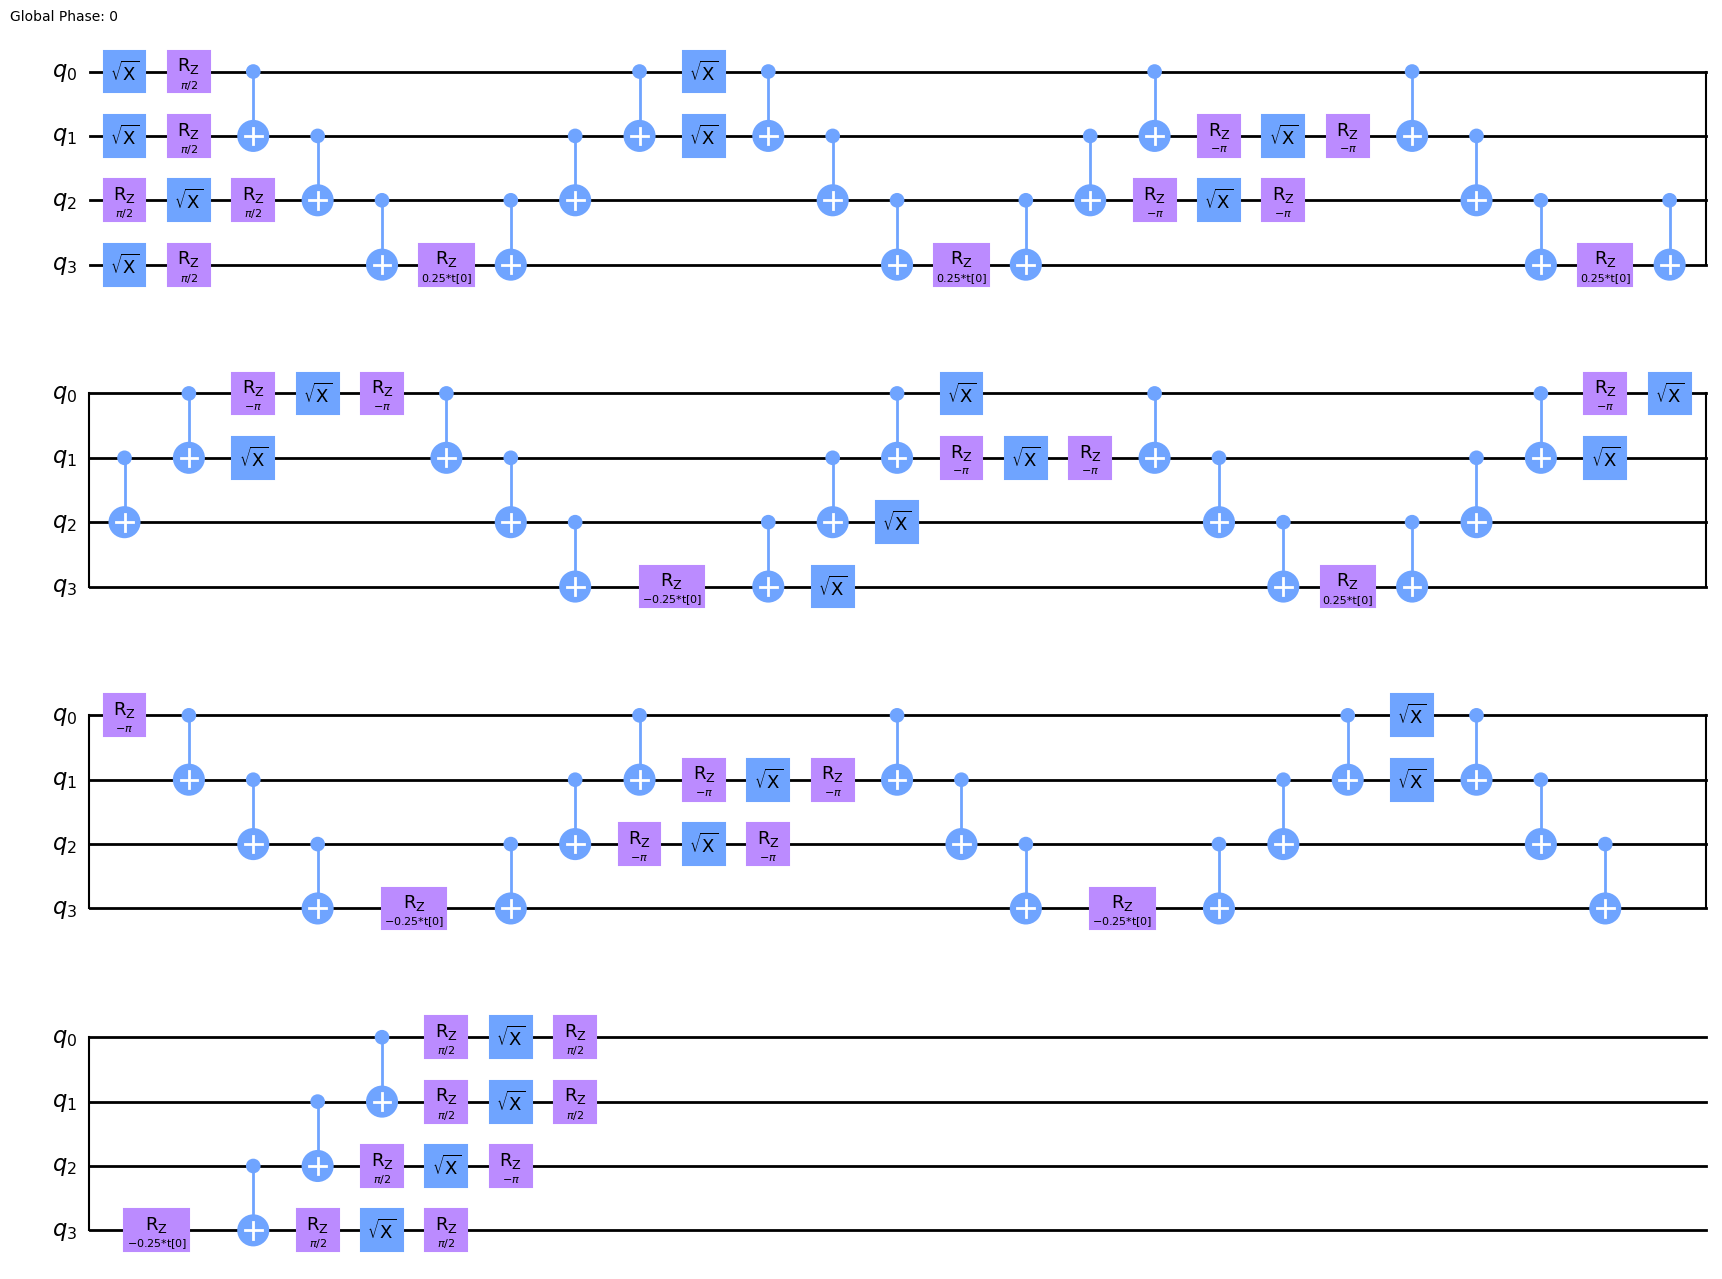

In [69]:
#Task2
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit_nature.circuit.library import PUCCD
mapper = JordanWignerMapper()
converter = QubitConverter(mapper)
num_particles=(1,1)
num_spin_orbitals=4
init_state=QuantumCircuit(4)
ansatz = PUCCD(converter,num_particles,num_spin_orbitals, initial_state = init_state)
t_ansatz=transpile(ansatz, basis_gates=['rz','sx','cx','x'])
t_ansatz.reverse_bits().draw('mpl')

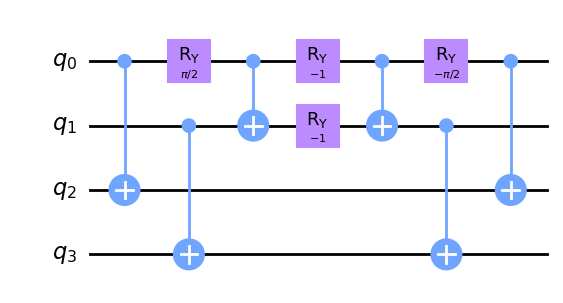

In [4]:
#Task3
import numpy as np
t=1
qc=QuantumCircuit(4)
qc.cx(0,2)
qc.cx(1,3)
qc.ry(np.pi/2,0)
qc.cx(0,1)
qc.ry(-t,0)
qc.ry(-t,1)
qc.cx(0,1)
qc.ry(-np.pi/2,0)
qc.cx(0,2)
qc.cx(1,3)

qc.draw('mpl')

In [5]:
#Task4
molecule = Molecule(
    geometry=[["H", [0.0, 0.0, 0.0]], ["H", [0.0, 0.0, 0.735]]], charge=0, multiplicity=1
)
driver = ElectronicStructureMoleculeDriver(
    molecule, basis="sto3g", driver_type=ElectronicStructureDriverType.PYSCF
)

es_problem = ElectronicStructureProblem(driver)
hamiltonian = es_problem.second_q_ops()[0]

mapper = JordanWignerMapper()
converter = QubitConverter(mapper)

hamiltonian = converter.convert(hamiltonian)
print(hamiltonian)

-0.8105479805373262 * IIII
+ 0.17218393261915524 * IIIZ
- 0.22575349222402502 * IIZI
+ 0.1721839326191554 * IZII
- 0.22575349222402502 * ZIII
+ 0.12091263261776641 * IIZZ
+ 0.16892753870087926 * IZIZ
+ 0.045232799946057875 * YYYY
+ 0.045232799946057875 * XXYY
+ 0.045232799946057875 * YYXX
+ 0.045232799946057875 * XXXX
+ 0.1661454325638243 * ZIIZ
+ 0.1661454325638243 * IZZI
+ 0.17464343068300456 * ZIZI
+ 0.12091263261776641 * ZZII


In [62]:
#Task5
# Bell state generation circuit
qc_measure = QuantumCircuit(4)
qc_measure.sdg([0,1,2,3])
qc_measure.h(0)
qc_measure.cx(0, 1)

qc_measure.h(2)
qc_measure.cx(2,3)
qc_measure.sx([0,1,2,3])

cliff = Clifford(qc_measure)
print(cliff.stabilizer)

#First devide h2_hamiltonian into two gruops(non-commuting each other)
#group1=[YYYY, XXYY, YYXX, XXXX] / group2=[residual operators]
#The number of iterations of the measurement required depends on the accuracy epsilon we want. In general, O((1/epsilon)**2) iterations need
#With grop2 circuit, we can easily measure [YYYY, XXYY, YYXX, XXXX] simultaneosly.(qc_measure is appended to original uccd circuit(group1) to chang group1 operator into z-string operator)
#group1
def group1(t):
    qc=QuantumCircuit(4)
    qc.cx(0,2)
    qc.cx(1,3)
    qc.ry(np.pi/2,0)
    qc.cx(0,1)
    qc.ry(-t,0)
    qc.ry(-t,1)
    qc.cx(0,1)
    qc.ry(-np.pi/2,0)
    qc.cx(0,2)
    qc.cx(1,3)
    return qc    

#group2
def group2(t):
    qc=QuantumCircuit(4)
    qc.cx(0,2)
    qc.cx(1,3)
    qc.ry(np.pi/2,0)
    qc.cx(0,1)
    qc.ry(-t,0)
    qc.ry(-t,1)
    qc.cx(0,1)
    qc.ry(-np.pi/2,0)
    qc.cx(0,2)
    qc.cx(1,3)
    qc.sdg([0,1,2,3])
    qc.h(0)
    qc.cx(0, 1)

    qc.h(2)
    qc.cx(2,3)
    qc.sx([0,1,2,3])
    return qc

StabilizerTable: ['+IIXX', '+IIYY', '+XXII', '+YYII']


In [66]:
#Task6
t=2.5 #(t_j - t_i)

qc=QuantumCircuit(4)
qc.x(1)
qc.ry(np.pi/2,0)
qc.cx(0,1)
qc.ry(-t,0)
qc.ry(-t,1)
qc.cx(0,1)
qc.ry(-np.pi/2,0)
qc.cx(0,2)
qc.cx(1,3)

qc.draw('mpl')

#1.6.2
from qiskit import Aer
qc.measure_all()
shots=100000
backend_sim=Aer.get_backend('aer_simulator')
count_list=backend_sim.run(qc, shots=shots).result().get_counts()
# '0101' and '1010' are only allowed configuration. So when we calculate probability, 
#P_1010= N_1010/(N_1010 + N_0101) can be used instead of the naive N_1010/shots estimation.

In [ ]:
ionq_provider = IonQProvider('r4o7WWWCZetVsf6TgrZ95PAF4PcpATmx')
ionq_provider.backends()
ionq_backend = ionq_provider.get_backend('ionq_qpu')

In [67]:
t_qc=transpile(qc, basis_gates=['rz','sx','x','rxx'])
ionq_provider = IonQProvider()
ionq_provider.backends()
ionq_backend = ionq_provider.get_backend('ionq_qpu')
counts_list=ionq_backend.run(t_qc).result().get_counts()

print('circ result with shot noise only: ',(count_list['1010']/shots)**0.5*1j)
print(f'exact result(ignoring sign)  : ',np.abs(np.cos(t))*1j)
print('exp_result : ', (counts_list['1010']/(counts_list['1010']+counts_list['0101']))**0.5*1j)

ibmqfactory.load_account:WARNING:2022-10-04 11:45:07,030: Credentials are already in use. The existing account in the session will be replaced.


circ result with shot noise only:  0.8004935977258032j
exact result(ignoring sign)  :  0.8011436155469337j
exp_result :  0.7897539744795119j
